In [13]:
import numpy as np
from matplotlib import pyplot
from astropy import units as u, constants as c

print(5+5)

10


In [11]:
import ugradio
divisor = 5
sample_freq = (62.5/divisor)*u.Mhz
dt = (1/sample_freq).to(u.ns)
N_samples =1600
times=np.arange(0,N_samples)*dt.to(u.us)
scaling_factor=1.0/np.linfo(np.int16).max
freqs_to_test=np.arange(.1,1.1,.1)*sample_freq
raw_data=np.loadtxt(¨lab_1.csv¨, delimiter=´,´,unppack=True, dtype=np.int16)
data=(((raw_data/(1.0*np.linfo(raw_data[0][0].dtype).max)))*u.V).to(u.mV)
np.unique(raw_data[0])/256

SyntaxError: invalid syntax (<ipython-input-11-418139a96aa9>, line 9)

In [72]:
import ugradio
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
import cmath
%matplotlib inline
#data1 = ugradio.pico.capture_data('500mV', divisor = 5)
#np.save('data9', data1)


This code cell will import all the data that we need for our plotting purposes as well as for when we calculate the DFT, Power and Voltage spectrums.

In [6]:
data1 = np.load('data1.npy')
data2 = np.load('data2.npy')
data3 = np.load('data3.npy')
data4 = np.load('data4.npy')
data5 = np.load('data5.npy')
data6 = np.load('data6.npy')
data7 = np.load('data7.npy')
data8 = np.load('data8.npy')
data9 = np.load('data9.npy')

In [18]:
sampling_frequency = 12.5e6
(1/sampling_frequency) * np.arange(1, 20, 1)

array([  8.00000000e-08,   1.60000000e-07,   2.40000000e-07,
         3.20000000e-07,   4.00000000e-07,   4.80000000e-07,
         5.60000000e-07,   6.40000000e-07,   7.20000000e-07,
         8.00000000e-07,   8.80000000e-07,   9.60000000e-07,
         1.04000000e-06,   1.12000000e-06,   1.20000000e-06,
         1.28000000e-06,   1.36000000e-06,   1.44000000e-06,
         1.52000000e-06])

Frequency has units of s⁻¹ so to get the time in between measurements we need to take the inverse of the sampling frequency to get how long it takes between successive measurements. from this we can create an array of times

In [47]:
def test_func(x, a, b):
    return a * np.sin(b * x)

params, params_covariance = optimize.curve_fit(test_func, time_data1[:20], data1[:20], p0 = [4000, 170])

[ 1024  2816  3584 ..., -2816 -2048     0]


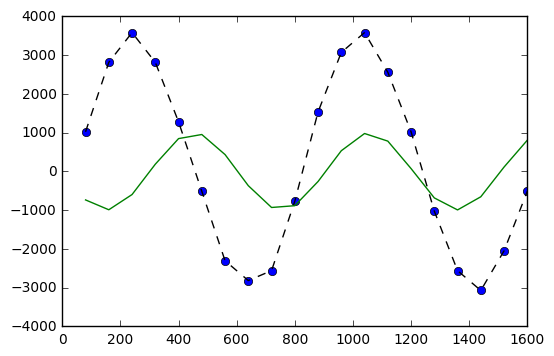

In [46]:


print(data1)
sampling_frequency = 12.5e6
time_data1 = (1/sampling_frequency) * np.arange(1, 1601, 1)* (1/1e-9)

plt.plot(time_data1[:20], data1[:20], 'o')
plt.plot(time_data1[:20], data1[:20], 'k--')
plt.plot(time_data1[:20], test_func(time_data1[:20], params[0], params[1]),
         label='Fitted function')

#need to make a time array for each of the data set since they each have
#different frequencies and different periods



Plotting Data Voltage vs Time

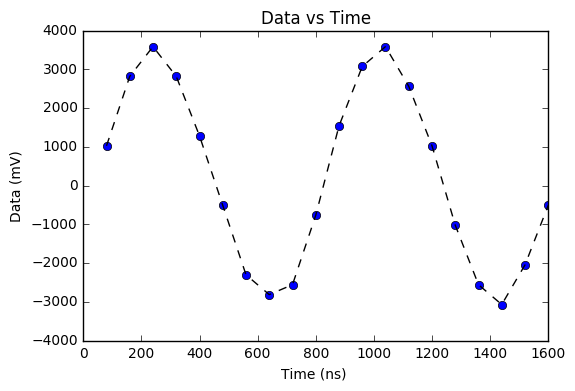

In [52]:
#givin that the sampling frequency is fixed we can use this time between
#measurments as constant since all we are changing is the signal frequency
#not the sampling frequency we simply take the inverse to find how many
#seconds between measurements and multiply it by an array going from 
#1 to 16000
sampling_freq = 12.5e6
time_data1 = (1/sampling_freq) * np.arange(1, 16001, 1)* (1/1e-9)


plt.title('Data vs Time')
plt.xlabel('Time (ns) ')
plt.ylabel('Data (mV)')
plt.plot(time_data1[:20], data1[:20], 'o')
plt.plot(time_data1[:20], data1[:20], 'k--')

Using the below code cells to work on the fft/dft

Suggestions: make N even(a power of two) I say we can use N = 32

In the documentation for the dft function we need to specify xt which is the function we have in the fourier transform this is eqn. 1 in section 5. I believe all that we have to do is multiply the voltages or electric field by the complex exponential term.

-The time range is another parameter we need to input and for that we need to make an array that has len 32 and make sure to make the starting point (-N/(2v_samp)) to ((N/2)-1)/(v_samp) with N = 32 and v_samp = 12.5MHz

-There is also an output frequency that we have to specify in the function and for that we have to calculate the first N frequencies running from -v_samp/2 to v_samp/2(1-(2/N)). Again here v_samp = 12.5MHz and N = 32


In [49]:
first32_data1 = data1[:32]

Making the time array

In [65]:
start_time = -16/sampling_freq
end_time = 15/sampling_freq
time_array = np.linspace(start_time, end_time, num = 32)
print(time_array)

[ -1.28000000e-06  -1.20000000e-06  -1.12000000e-06  -1.04000000e-06
  -9.60000000e-07  -8.80000000e-07  -8.00000000e-07  -7.20000000e-07
  -6.40000000e-07  -5.60000000e-07  -4.80000000e-07  -4.00000000e-07
  -3.20000000e-07  -2.40000000e-07  -1.60000000e-07  -8.00000000e-08
   0.00000000e+00   8.00000000e-08   1.60000000e-07   2.40000000e-07
   3.20000000e-07   4.00000000e-07   4.80000000e-07   5.60000000e-07
   6.40000000e-07   7.20000000e-07   8.00000000e-07   8.80000000e-07
   9.60000000e-07   1.04000000e-06   1.12000000e-06   1.20000000e-06]


Making the frequency array 

In [66]:
starting_freq = -sampling_freq/2
ending_freq = (sampling_freq/2)*(1-(1/16))
freq_arr = np.linspace(starting_freq, ending_freq, num = 32)
print(freq_arr)

[-6250000.         -5846774.19354839 -5443548.38709677 -5040322.58064516
 -4637096.77419355 -4233870.96774194 -3830645.16129032 -3427419.35483871
 -3024193.5483871  -2620967.74193548 -2217741.93548387 -1814516.12903226
 -1411290.32258064 -1008064.51612903  -604838.70967742  -201612.90322581
   201612.90322581   604838.70967742  1008064.51612903  1411290.32258064
  1814516.12903226  2217741.93548387  2620967.74193548  3024193.5483871
  3427419.35483871  3830645.16129032  4233870.96774194  4637096.77419355
  5040322.58064516  5443548.38709677  5846774.19354839  6250000.        ]


Calculating the xt(complex integrand) in fourier transform 

In [68]:
def xt(E, t, nu):
    val = E * np.exp(2j * np.pi * nu * t)
    return val 

integrand = xt(first32_data1, time_array, freq_arr)

print(integrand)

[ 1024.00000000 -2.00646132e-12j  2801.55201467 +2.84889995e+02j
  2941.61617329 +2.04742528e+03j   142.62805945 +2.81238568e+03j
 -1221.29824819 +3.83184797e+02j    77.53102208 +5.06095782e+02j
 -2117.27879797 -9.08595890e+02j  2758.35631457 -5.66856633e+02j
 -2352.53199775 +1.00955099e+03j   752.27899488 -1.54597263e+02j
  1411.51919865 +6.05730593e+02j  -465.18613249 -3.03657469e+03j
 -3419.63509494 +1.07291743e+03j   129.66187223 +2.55671426e+03j
   840.46176380 +5.84978652e+02j -1018.74618715 -1.03596362e+02j
 -2560.00000000 +0.00000000e+00j -2931.11579566 -9.19643514e+02j
 -1083.31829315 -1.73802344e+03j   270.82957329 -4.34505860e+02j
 -1342.99640240 -7.45423814e+02j  2136.66287350 -1.83426491e+03j
  -181.52662112 +3.57939996e+03j  -978.01159201 -2.64071000e+03j
   355.64057891 +9.60258183e+02j   -51.86474889 +1.02268570e+03j
  1748.17871468 -1.50076220e+03j -2462.16007106 -1.36661033e+03j
 -1218.73307979 +1.95527637e+03j   270.82957329 +4.34505860e+02j
 -1465.55789783 -4.598217

In [87]:
fft_data1 = ugradio.dft.dft(integrand, time_array, freq_arr)
print(fft_data1)

(array([-6250000.        , -5846774.19354839, -5443548.38709677,
       -5040322.58064516, -4637096.77419355, -4233870.96774194,
       -3830645.16129032, -3427419.35483871, -3024193.5483871 ,
       -2620967.74193548, -2217741.93548387, -1814516.12903226,
       -1411290.32258064, -1008064.51612903,  -604838.70967742,
        -201612.90322581,   201612.90322581,   604838.70967742,
        1008064.51612903,  1411290.32258064,  1814516.12903226,
        2217741.93548387,  2620967.74193548,  3024193.5483871 ,
        3427419.35483871,  3830645.16129032,  4233870.96774194,
        4637096.77419355,  5040322.58064516,  5443548.38709677,
        5846774.19354839,  6250000.        ]), array([ -7258.70577450+10286.17744419j,   -323.76059537 +5671.80348471j,
         4583.49215916 -2260.18239613j,  -1575.87783678 +3232.58777948j,
         1978.13823546-11237.21529027j,   -570.06770333 -3530.74816364j,
        20143.56279554+14851.6444467j ,   2109.11113317 +2364.37094852j,
       -16522.583180

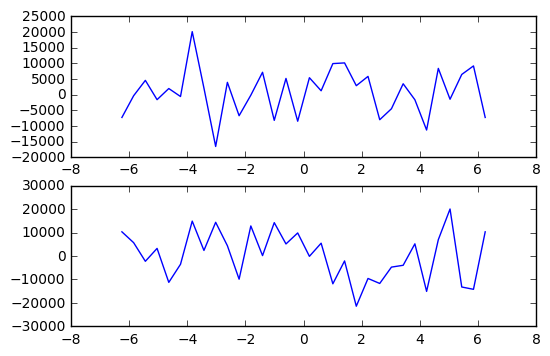

In [88]:
plt.subplot(211)
plt.plot(fft_data1[0]/1e6, fft_data1[1].real)
plt.subplot(212)
plt.plot(fft_data1[0]/1e6, fft_data1[1].imag)

Making Power Spectrum

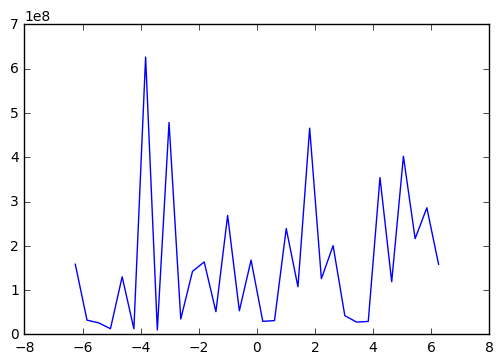

In [92]:
power_spec = np.abs(fft_data1[1])**2

plt.plot(freq_arr/1e6, power_spec)